# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
%matplotlib inline
sns.set(color_codes= True)
sns.mpl.rc("figure", figsize=(6, 4))

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
# number of callbacks for black-sounding names
black = sum(data[data.race=='b'].call)
white = sum(data[data.race=='w'].call)
black, white

(157.0, 235.0)

In [5]:
df = data[['race' , 'call']]
df.groupby('race').size()

race
b    2435
w    2435
dtype: int64

In [6]:
bl = 157.0/2435.0 
wh = 235.0/2435.0 
diff = abs(bl - wh)
bl, wh, diff

(0.06447638603696099, 0.09650924024640657, 0.032032854209445585)

Proportion of black sounding men got a callback .065 and that for a white man is .0965 and let's visualize it using a factorplot.

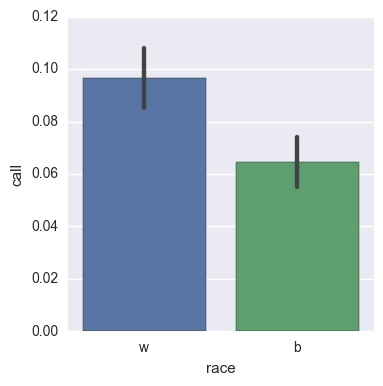

In [7]:
sns.factorplot(x="race", y="call", data=data, size=4, kind="bar")

To apply the central limit theorem (CLT), we have to check for two criteria: 1) $np$ is at least 10. 2) (1- $np$) is at least 10. $\hat{p}$ = (total number of black callback + total number of white callback)/total applicant

In [8]:
# phat calculation 
p_exp = (157.0+235.0)/4870.0
p_exp

0.08049281314168377

In [9]:
call_prob_white = p_exp*2435
nocall_prob_white = (1-p_exp)*2435
call_prob_white >= 10, nocall_prob_white>=10

(True, True)

In [10]:
call_prob_black = p_exp*2435
nocall_prob_black = (1-p_exp)*2435
call_prob_black >= 10, nocall_prob_black>=10

(True, True)

<li> CLT will apply here because the samples are chosen randomly and they are independent; Furthermore, $np$ >= 10, and (1- $np$) >=10.
Now we set up null and alternate hypothesis. The null hypothesis is that there is no difference in groups and we will calculate the probability of seeing 3.2% difference between black and white population in 95% confidence level to determine the statistical significance.

the calculation is as follows: 
<p> teststat = difference in percentage = abs(black - white)
<p> $\hat{p}$ = p_exp = (black+white)/total
<p> standard error = $\sqrt(\hat{p}(1-\hat{p})$/($n_1$+$n_2$)
<p> z_score = standard error/ teststat
<p> p-value is calculated from zscore using norm function. 

In [11]:
def ZscoreProp(num1, num2, size1, size2):
    num1, num2, size1, size2 = float(num1), float(num2), float(size1), float(size2)
    prop1 = num1/size1
    prop2 = num2/size2
    teststat = abs(prop1 - prop2)
    p_exp = (num1 + num2)/(size1+size2)
    std_err = round(np.sqrt(p_exp*(1-p_exp)*(1/size1 + 1/size2)), 2)
    z_score = round(teststat/std_err, 2)
    p_value = st.norm.sf(z_score)*2
    conf1 = round(teststat - (1.96*std_err), 3)
    conf2 = round(teststat + (1.96*std_err), 3)
    return z_score, p_value, conf1, conf2
ZscoreProp(black, white, 2435, 2435)

(3.2, 0.0013742758758316942, 0.012, 0.052)

The function Zscoreprop takes four numbers (numbers of black and white callbacks, respective total number of black and white applicants) and calculates zscore, p-value and 95% confidence interval. We see that with a zscore of 3.2 and p-value <.001, we can say that difference of 3.2% in resume callback between black and white sounding name is statistically significant, and it is likely that the white sounding names get more callbacks.

<p> Let's see if the gender of the applicants play any role in callbacks.

In [12]:
ds = data[['sex' , 'call']]
female = sum(ds[ds.sex=='f'].call)
male = sum(ds[ds.sex=='m'].call)
female, male

(309.0, 83.0)

In [13]:
ds.groupby('sex').size()

sex
f    3746
m    1124
dtype: int64

In [14]:
f = 309.0/3746.0 
m = 83.0/1124.0 
diff = abs(f - m)
f, m, diff

(0.08248798718633209, 0.07384341637010676, 0.008644570816225328)

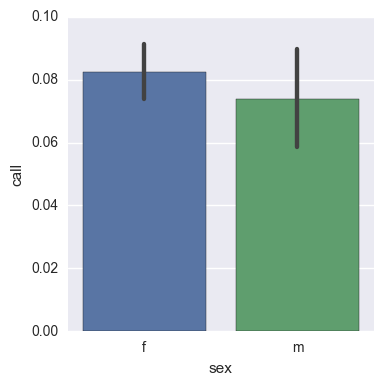

In [15]:
sns.factorplot(x="sex", y="call", data=data, size=4, kind="bar")

In [16]:
ZscoreProp(female, male, 3746, 1124) 

(0.86, 0.38978904250361679, -0.011, 0.028)

With a 38% p-value, we cannot reject the null hypothesis, and the difference between male and female callbacks are statistically not significant. 

<p> We can also see if sales jobs are favored to any race or sex.

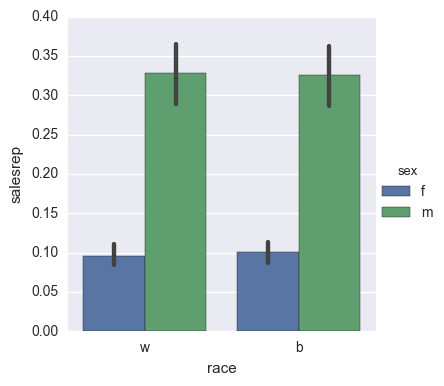

In [17]:
sns.factorplot(x="race", y="salesrep", hue = 'sex', data=data, size=4, kind="bar")

In [18]:
db1 = data.groupby(['sex', 'race', 'salesrep']).size()
db1

sex  race  salesrep
f    b     0.0         1697
           1.0          189
     w     0.0         1681
           1.0          179
m    b     0.0          370
           1.0          179
     w     0.0          386
           1.0          189
dtype: int64

In [19]:
1697+189, 1681+179, 370+179, 386+179 # total sizes bf, wf, bm, wm 

(1886, 1860, 549, 565)

In [20]:
ZscoreProp(179, 189, 549, 565) # black and white male # not significant

(0.28, 0.77947750488840561, -0.05, 0.067)

<li> we see that for **sales** jobs, the discrimination between **black and white male** is statistically **NOT** significant. 

In [21]:
ZscoreProp(189, 179, 1886, 1860) # black and white female # not significant

(0.4, 0.68915651677935164, -0.016, 0.024)

<li> we see that for **sales** jobs, the discrimination between **black and white female** is statistically **NOT** significant. 

In [22]:
[col for col in data.columns if 'sales' in col]

['parent_sales', 'branch_sales', 'salesrep', 'retailsales']

In [23]:
dsales = data[['race', 'sex', 'retailsales']]
dsales.head()

,race,sex,retailsales
0,w,f,0.0
1,w,f,0.0
2,b,f,0.0
3,b,f,0.0
4,w,f,0.0


In [24]:
db2 = data.groupby(['race', 'sex', 'retailsales']).size()
db2

race  sex  retailsales
b     f    0.0            1675
           1.0             211
      m    0.0             351
           1.0             198
w     f    0.0            1647
           1.0             213
      m    0.0             379
           1.0             196
dtype: int64

In [25]:
1675+211, 1647+213

(1886, 1860)

In [26]:
ZscoreProp(211, 213, 1886, 1860) # not significant black and white female

(0.26, 0.79486377359647897, -0.017, 0.022)

<li> we see again that for **retailsales** jobs, the discrimination between male or female is statistically **NOT** significant. 

In [27]:
[col for col in data.columns if 'service' in col]

['busservice', 'othservice']

In [28]:
db3 = data.groupby(['race', 'busservice']).size()
db3

race  busservice
b     0.0           1783
      1.0            652
w     0.0           1783
      1.0            652
dtype: int64

In [29]:
db4 = data.groupby(['race', 'othservice']).size()
db4

race  othservice
b     0.0           2058
      1.0            377
w     0.0           2058
      1.0            377
dtype: int64

In [30]:
db6 = data.groupby(['race', 'sex', 'call']).size()
db6

race  sex  call
b     f    0.0     1761
           1.0      125
      m    0.0      517
           1.0       32
w     f    0.0     1676
           1.0      184
      m    0.0      524
           1.0       51
dtype: int64

In [31]:
1761+125, 1676+184, 517+32, 524+51

(1886, 1860, 549, 575)

In [32]:
ZscoreProp(125, 184, 1886, 1860) # statistically significant # black female vs white female

(3.26, 0.0011141221380492428, 0.013, 0.052)

In [33]:
ZscoreProp(32, 51, 549, 575) # statistically not significant for black male vs white male

(1.52, 0.12851097563787162, -0.009, 0.07)

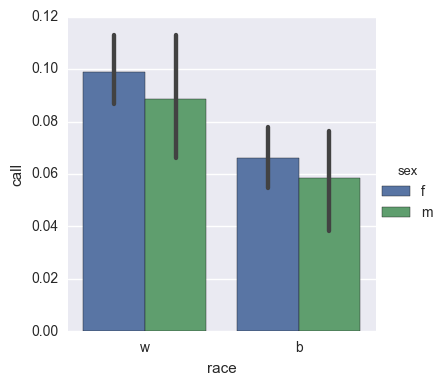

In [34]:
sns.factorplot(x="race", y="call", hue = 'sex', data=data, size=4, kind="bar")

In [35]:
dchicago = data[data.city == 'c']
dchicago = dchicago[['race', 'call']]
dchicago.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [36]:
# number of callbacks for black-sounding names
black = sum(dchicago[dchicago.race=='b'].call)
white = sum(dchicago[dchicago.race=='w'].call)
black, white

(73.0, 109.0)

In [37]:
dchicago.groupby('race').size()

race
b    1352
w    1352
dtype: int64

In [38]:
bl = 73.0/1352.0 
wh = 109.0/1352.0 
diff = abs(bl - wh)
bl, wh, diff

(0.053994082840236685, 0.08062130177514792, 0.02662721893491124)

In [39]:
ZscoreProp(73, 109, 1352, 1352)

(2.66, 0.0078140651497055486, 0.007, 0.046)

In [40]:
dboston = data[data.city == 'b']
dboston = dboston[['race', 'call']]
black = sum(dboston[dboston.race=='b'].call)
white = sum(dboston[dboston.race=='w'].call)
black, white

(84.0, 126.0)

In [41]:
dboston.groupby('race').size()

race
b    1083
w    1083
dtype: int64

In [42]:
bl = 84.0/1083.0
wh = 126.0/1083.0 
diff = abs(bl - wh)
bl, wh, diff

(0.07756232686980609, 0.11634349030470914, 0.03878116343490305)

In [43]:
ZscoreProp(84, 126, 1083, 1083)

(3.88, 0.00010445646480364013, 0.019, 0.058)

<li> We see that with a zscore of 2.6 and p-value <0.008, we can say that difference of 2.6% in resume callback between black and white sounding name is statistically significant, and it is likely that the white sounding names get more callbacks in **Chicago**. On the other hand, **Boston** seems to have slightly higher racial gap (3.8%). In both the cases though, it's more likely that white sounding names get more callbacks.

### Summary 

<p> 

<li>  Equal employment policies in the US state that employers should not discriminate between race, sex, sexual orientation or religion while choosing candidates. In this experiment, nearly 5000 resumes were sent to different employers in Chicago and Boston. The half of the resumes contained predominantly black sounding names (like Lakisha Washington or Jamal Jones), while the other half was white sounding names(like Greg Baker or Emily Walsh). The resumes were sent to employers in different sectors such as accounting, sales and service, etc. The resumes were also varied by qualities by adding some extra factors such as computer courses, summer internships, etc. Two high quality and two low quality resumes were sent to each job opening. <p>

<li>  We first looked at the race versus callback part of the dataset. We found that with same quality of resumes, 9.65% white applicants got a callback from employers while only 6.44% of black candidates received the same. To determine if this 3.2% difference is statistically significant or not, we set up an experiment assuming that there is no difference between black and white callbacks (null hypothesis). The alternate hypothesis is then white sounding names are more likely to get a callback. 

<li> The experiment was designed such a way that one callback does not depend on the other and therefore we can say that the variables are independent. We checked for other conditions for CLT ($np$ >= 10, and (1- $np$) >=10.). We computed zscore, p-values and 95% confidence interval against the null hypothesis and found that the white callback of 3.2% is statistically significant. We conclude then that the white sounding names are likely to get more callbacks. I think it's an important experiment to quantify racial discrimination and it is beyond doubt that employers prefer a white sounding name rather than a black one with an equal quality resume. However, as it is pointed out in the actual paper, the race is measured through a white sounding or black sounding name - there was no direct measurement. Secondly, resume callback does not mean a job. Nevertheless, getting a job by all means depend on a callback from employers after submitting the resume. 

<li> We used the same dataset to look for any discrimination based on sex. In this case, zscore and p-value suggests that this difference is not statistically significant. 

<li> We also found that white females got more callbacks than black females, this result is statistically significant.

<li> We also checked for discrimination in different cities (Chicago and Boston) using this dataset. Chicago seems to have less white callbacks than Boston.